<a href="https://colab.research.google.com/github/Danar1111/OpenPose-GoogleColab/blob/main/OpenPose_Verif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Python 3.9
!sudo apt-get update -y
!sudo apt-get install python3.9 python3.9-dev python3.9-distutils -y

# Ganti symbolic link agar default Python menjadi Python 3.9
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!sudo update-alternatives --config python3

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,319 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,705 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,664 kB]
Get:13 http://archive.ubuntu.com

In [ ]:
!python3 -m pip install --upgrade pip
!python3 -m pip install --upgrade pybind11


/usr/bin/python3: No module named pip
/usr/bin/python3: No module named pip


In [ ]:
import os
OPENPOSE_PATH="./openpose/"
HOME_PATH='./'

!echo $HOME_PATH

./


In [ ]:
#@title
!pip install ffmpeg-python
from os.path import exists, join, basename, splitext

# see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.17/cmake-3.17.2-Linux-x86_64.tar.gz
!tar xfz cmake-3.17.2-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# install system dependencies
!apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
!rm -rf openpose
# clone openpose
!git clone -q --depth 1 $git_repo_url
# --recursive necessary in the line below, as otherwise you can (sometimes) get "lpthreads" errors in cmake ("undefined reference to `pthread_create'" etc). See, for example, https://github.com/facebookarchive/caffe2/issues/1234
!sed -i 's/execute_process(COMMAND git checkout --recursive master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
!cd openpose && git submodule update --init --recursive --remote

!wget "https://drive.usercontent.google.com/download?id=1QCSxJZpnWvM00hx49CJ2zky7PWGzpcEh&export=download&authuser=0&confirm=t&uuid=50355e54-0445-4875-9d0e-3866a1f6239d&at=APZUnTVA3sHsK5rk-u2O6phIms2L%3A1711987634035" -O models.zip

# !cp "/content/drive/MyDrive/VTO/openpose/models.zip" "/content/"
!unzip models.zip -d openpose

Selecting previously unselected package liblmdb0:amd64.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../00-liblmdb0_0.9.24-1build2_amd64.deb ...
Unpacking liblmdb0:amd64 (0.9.24-1build2) ...
Selecting previously unselected package libgflags2.2.
Preparing to unpack .../01-libgflags2.2_2.2.2-2_amd64.deb ...
Unpacking libgflags2.2 (2.2.2-2) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../02-libgflags-dev_2.2.2-2_amd64.deb ...
Unpacking libgflags-dev (2.2.2-2) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../03-libgoogle-glog0v5_0.5.0+really0.4.0-2_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.5.0+really0.4.0-2) ...
Selecting previously unselected package libunwind-dev:amd64.
Preparing to unpack .../04-libunwind-dev_1.3.2-2build2.1_amd64.deb ...
Unpacking libunwind-dev:amd64 (1.3.2-2build2.1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to un

In [ ]:
! sed -i 's/executeShInItsFolder "getModels.sh"/# executeShInItsFolder "getModels.sh"/g' ./openpose/scripts/ubuntu/install_openpose_JetsonTX2_JetPack3.1.sh
! sed -i 's/executeShInItsFolder "getModels.sh"/# executeShInItsFolder "getModels.sh"/g' ./openpose/scripts/ubuntu/install_openpose_JetsonTX2_JetPack3.3.sh
! sed -i 's/download_model("BODY_25"/# download_model("BODY_25"/g' ./openpose/CMakeLists.txt
! sed -i 's/78287B57CF85FA89C03F1393D368E5B7/# 78287B57CF85FA89C03F1393D368E5B7/g' ./openpose/CMakeLists.txt
! sed -i 's/download_model("body (COCO)"/# download_model("body (COCO)"/g' ./openpose/CMakeLists.txt
! sed -i 's/5156d31f670511fce9b4e28b403f2939/# 5156d31f670511fce9b4e28b403f2939/g' ./openpose/CMakeLists.txt
! sed -i 's/download_model("body (MPI)"/# download_model("body (MPI)"/g' ./openpose/CMakeLists.txt
! sed -i 's/2ca0990c7562bd7ae03f3f54afa96e00/# 2ca0990c7562bd7ae03f3f54afa96e00/g' ./openpose/CMakeLists.txt
! sed -i 's/download_model("face"/# download_model("face"/g' ./openpose/CMakeLists.txt
! sed -i 's/e747180d728fa4e4418c465828384333/# e747180d728fa4e4418c465828384333/g' ./openpose/CMakeLists.txt
! sed -i 's/download_model("hand"/# download_model("hand"/g' ./openpose/CMakeLists.txt
! sed -i 's/a82cfc3fea7c62f159e11bd3674c1531/# a82cfc3fea7c62f159e11bd3674c1531/g' ./openpose/CMakeLists.txt

In [ ]:
!cd openpose && rm -rf build || true && mkdir build

In [ ]:
cmake_file='/content/openpose/CMakeLists.txt'
!cd openpose && sed -i 's/-DBUILD_python=OFF/-DBUILD_python=ON/g' $cmake_file
!cd openpose && sed -i 's/-DBUILD_python_layer=OFF/-DBUILD_python_layer=ON/g' $cmake_file

!cd openpose && sed -i 's/option(BUILD_PYTHON "Build OpenPose python." OFF)/option(BUILD_PYTHON "OpenPose python." ON)\noption(BUILD_BIN_FOLDER "Copy 3rd-party DLL files." ON)/g' $cmake_file

In [ ]:
!cd openpose && cd build && cmake .. -DUSE_CUDNN=OFF -DGENERATE_PYTHON_BINDINGS:BOOL="1" -DPYTHON_LIBRARY='/usr/lib/x86_64-linux-gnu/libpython3.10.so' && make -j`nproc`

-- GCC detected, adding compile flags
-- GCC detected, adding compile flags
-- Building with CUDA.
-- CUDA detected: 12.5
-- Added CUDA NVCC flags for: sm_75
-- Found cuDNN: ver. 9.2.1 found (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libcudnn.so)
-- Found gflags  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libgflags.so)
-- Found glog    (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libglog.so)
-- Caffe will be downloaded from source now. NOTE: This process might take several minutes depending
        on your internet connection.
-- Caffe has already been downloaded.
HEAD is now at 1807aada Added Ampere arch's (CUDA11)
-- Caffe will be built from source now.
-- Adding Example calibration.bin
-- Adding Example tutorial_add_module_custom_post_processing.bin
-- Adding Example tutorial_api_thread_1_user_processing_function.bin
-- Adding Example tutorial_api_thread_2_user_input_processing_output_and_datum.bin
-- Adding Example openpose.bin
-- Addin

In [ ]:
!mkdir images

In [ ]:
!cd "$OPENPOSE_PATH" && chmod -R 755 ./build/
!cd "$OPENPOSE_PATH" && ./build/examples/openpose/openpose.bin \
  --image_dir ../images \
  --write_images ../output_images/ \
  --face --hand --display 0 --render_pose 1

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 3.693281 seconds.


📂 Silakan upload gambar untuk diproses...


Saving flipped_duduk2 (4).jpg to flipped_duduk2 (4).jpg
⏳ Memproses gambar dengan OpenPose...
✅ Proses selesai!


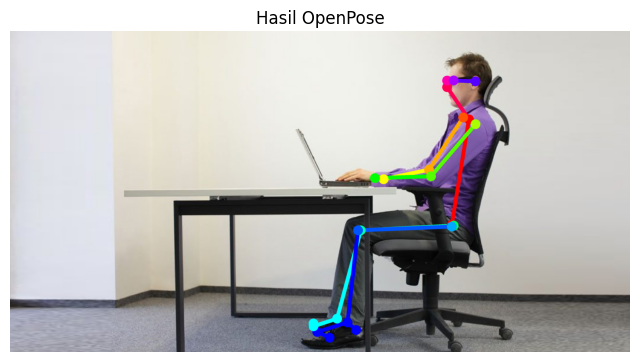

In [ ]:
# Import library
import os
import cv2
import numpy as np
import subprocess
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

# 1️⃣ Upload gambar ke Colab
print("📂 Silakan upload gambar untuk diproses...")
uploaded = files.upload()

# Ambil nama file yang di-upload
input_image = list(uploaded.keys())[0]

# Tentukan path untuk OpenPose dan output
openpose_path = "/content/openpose"
image_dir = "/content/images"
output_dir = f"{openpose_path}/output_images"

# Pastikan folder images dan output ada
os.makedirs(image_dir, exist_ok=True)
os.makedirs(output_dir, exist_ok=True)

# Pindahkan gambar ke folder images/
input_image_path = os.path.join(image_dir, input_image)
os.rename(input_image, input_image_path)

# 2️⃣ Menentukan nama output sesuai format OpenPose
# Misalnya: "gambar.jpg" → "gambar_rendered.jpg"
file_name, file_ext = os.path.splitext(input_image)
output_image_name = f"{file_name}_rendered.png"
output_image_path = os.path.join(output_dir, output_image_name)

# 3️⃣ Jalankan OpenPose untuk mendeteksi pose
cmd = f"""
cd {openpose_path} && ./build/examples/openpose/openpose.bin \
    --image_dir {image_dir} \
    --write_images {output_dir} \
    --display 0 --render_pose 1
"""

print("⏳ Memproses gambar dengan OpenPose...")
result = subprocess.run(cmd, shell=True, capture_output=True, text=True)

# Jika ada error, tampilkan log
if result.returncode != 0:
    print("🚨 Terjadi kesalahan saat menjalankan OpenPose!")
    print(result.stderr)
else:
    print("✅ Proses selesai!")

# 4️⃣ Cek hasilnya dan langsung tampilkan gambar dengan nama yang benar
if os.path.exists(output_image_path):
    img = cv2.imread(output_image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Hasil OpenPose")
    plt.show()
else:
    print(f"❌ Gagal menemukan gambar output: {output_image_path}. Coba cek folder output_images secara manual.")
